<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Mohammadreza Ahmadi teshnizi
### Student Number : 98170646
### Colab Link: https://colab.research.google.com/drive/1Tv5zeI4hYT4gelgoKnSYHZU487pTwAcM#scrollTo=5sy39_vXU_PO
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Data Exploration (20 points)

In [ ]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-10 14:39:05--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-10 14:39:05--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c38d2cd0288a6364070eb7959.dl.dropboxusercontent.com/cd/0/get/B7wOjYJi9LHh8aB4LIv61Fy26xMimccsyzKofaEqqTcQ_C-grNQf7oh84L4mUk4TIZsGyqRL72jf6k2t3I9mSDrGKr0KVi3RcydcI5EBAehYz0ui-l6rH2FnuR8tqBchvANy_2dfwDI_p9wnUPqBudJl_Xel8tWjNQ8ps-i3aA7HuxOSL7kr4qfHHuXqToIu4RE/file?dl=1# [following]
--2023-05-10 14:39:06--  https://uc9c38d2cd0288a6364070eb7959.dl.dropboxusercontent.com/cd/0/get/B7wOjYJi9LHh8aB4LIv61Fy26xMimccsyzKofaEqqTcQ_C-grNQf7oh84L4mUk4TIZ

Load the dataset as a dataframe

In [ ]:
import pandas as pd

# Load the dataset as a DataFrame
df = pd.read_csv('/content/dataset.csv')

# Display the first few rows of the DataFrame
print(df)

                    Country  Year      Status  Life expectancy   \
0                   Finland  2013  Developing              87.0   
1                     Japan  2015   Developed              83.7   
2      Syrian Arab Republic  2014  Developing              64.4   
3                    Latvia  2010   Developed              72.8   
4     Sao Tome and Principe  2013  Developing              67.1   
...                     ...   ...         ...               ...   
2492                Tunisia  2000  Developing              72.9   
2493                Myanmar  2001  Developing              62.5   
2494            Netherlands  2008   Developed              83.0   
2495            South Sudan  2013  Developing              56.4   
2496              Guatemala  2000  Developing              67.7   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0                79.0              0     8.97             6115.496624   
1                55.0              2      NaN    

Plot "year" against "average life expectancy"

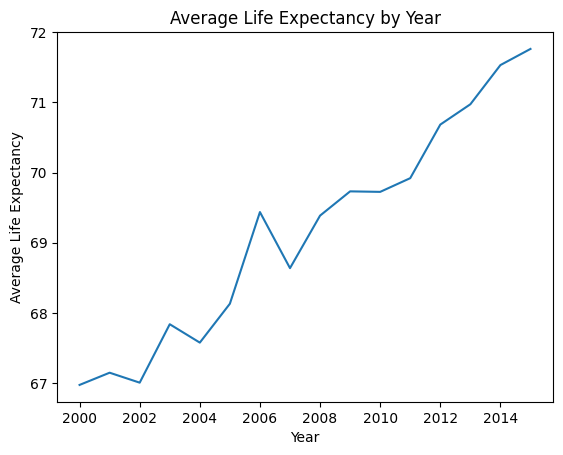

In [ ]:
import matplotlib.pyplot as plt

# Remove the extra space at the end of the column name
df.rename(columns={'Life expectancy ': 'Life expectancy'}, inplace=True) 

# Calculate average life expectancy for each year
average_life_expectancy_by_year = df.groupby('Year')['Life expectancy'].mean()

# Plotting "year" against "average life expectancy"
plt.plot(average_life_expectancy_by_year.index, average_life_expectancy_by_year.values)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year')

# Display the plot
plt.show()


Compare the average life expectancy of "Developed" and "Developing" countries for each year 

Status  Developed  Developing
Year                         
2000    76.891667   65.004959
2001    77.114286   65.048120
2002    77.710000   64.393496
2003    78.257692   65.617213
2004    78.452000   65.500000
2005    78.792593   65.898450
2006    79.346667   67.167939
2007    79.252381   66.935878
2008    78.796552   67.365185
2009    79.581481   67.777206
2010    80.167857   67.404762
2011    79.821739   68.182443
2012    80.512000   68.823485
2013    80.376923   69.049606
2014    81.292593   69.442063
2015    80.175000   69.937984


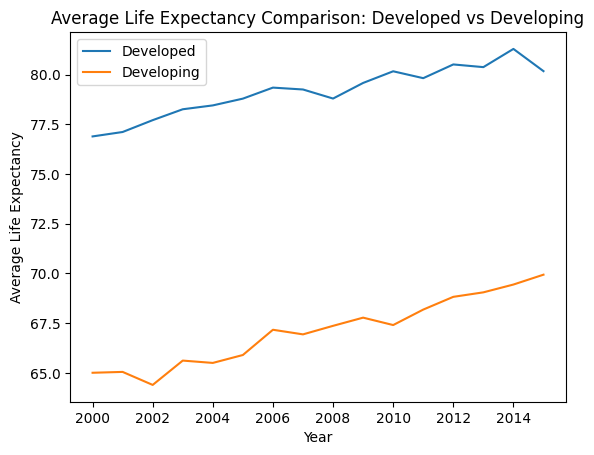

In [ ]:
import pandas as pd

# Group the data by "Year" and "Status" and calculate the average life expectancy
average_life_expectancy = df.groupby(['Year', 'Status'])['Life expectancy'].mean()

# Convert the result to a DataFrame for better visualization
average_life_expectancy_df = pd.DataFrame(average_life_expectancy).reset_index()

# Pivot the DataFrame to have "Year" as the index and "Status" as columns
pivot_table = average_life_expectancy_df.pivot(index='Year', columns='Status', values='Life expectancy')

# Display the pivot table
print(pivot_table)


import matplotlib.pyplot as plt

# Plotting the average life expectancy for "Developed" and "Developing" countries
plt.plot(pivot_table.index, pivot_table['Developed'], label='Developed')
plt.plot(pivot_table.index, pivot_table['Developing'], label='Developing')

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy Comparison: Developed vs Developing')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Get the correlation between "Life expectancy" and "GDP"

In [ ]:
correlation = df['Life expectancy'].corr(df['GDP'])
print("Correlation between Life expectancy and GDP:", correlation)

Correlation between Life expectancy and GDP: 0.4652553879500644


Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [ ]:
# Calculate the correlation between "Life expectancy" and each feature
correlations = df.corr()['Life expectancy'].abs()

# Exclude the "Life expectancy" column itself
correlations = correlations.drop('Life expectancy')

# Find the feature with the highest correlation
strongest_correlation_feature = correlations.idxmax()

# Print the result
print("Feature with the strongest correlation: ", strongest_correlation_feature)


Feature with the strongest correlation:  Schooling


<ipython-input-337-3aaa80c0cd7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Life expectancy'].abs()


# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [ ]:
# Remove rows with NaN values
df.dropna(inplace=True)

# Confirm the removal by displaying the updated DataFrame shape
print("Shape of DataFrame after removing NaN values:", df.shape)
print("--------------------------------------------------------")
print(df)

Shape of DataFrame after removing NaN values: (1415, 22)
--------------------------------------------------------
                    Country  Year      Status  Life expectancy  \
3                    Latvia  2010   Developed             72.8   
4     Sao Tome and Principe  2013  Developing             67.1   
7                  Colombia  2005  Developing             73.1   
11                 Botswana  2012  Developing             63.4   
12                   Mexico  2014  Developing             76.6   
...                     ...   ...         ...              ...   
2481              Mauritius  2009  Developing             72.8   
2485                   Mali  2009  Developing             56.0   
2488           Turkmenistan  2008  Developing             64.5   
2490                 Angola  2007  Developing             48.2   
2492                Tunisia  2000  Developing             72.9   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
3                18.

Convert categorical columns into their one-hot encoded versions

In [ ]:
categorical_columns = ['Country', 'Status', 'Year']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the updated DataFrame
df_encoded.head()



,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
3,72.8,18.0,0,9.80,1109.969508,91.0,0,58.9,0,92.0,...,0,0,0,0,1,0,0,0,0,0
4,67.1,192.0,0,0.01,200.660099,97.0,0,29.3,0,97.0,...,0,0,0,0,0,0,0,1,0,0
7,73.1,144.0,15,4.38,531.980818,93.0,0,5.5,18,93.0,...,0,0,0,0,0,0,0,0,0,0
11,63.4,3.0,2,0.01,12.834474,95.0,7,36.2,3,96.0,...,0,0,0,0,0,0,1,0,0,0
12,76.6,122.0,31,5.26,168.173753,84.0,3,62.8,36,87.0,...,0,0,0,0,0,0,0,0,1,0


Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [ ]:
import numpy as np

# Remove the "Life expectancy" column and convert the remaining DataFrame to a NumPy array (x)
x = df_encoded.drop("Life expectancy", axis=1).to_numpy()

# Create a NumPy array (y) containing only the "Life expectancy" column
y = df_encoded["Life expectancy"].to_numpy()

# Display the shapes of the arrays
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (1415, 169)
Shape of y: (1415,)


Normalize the data

In [ ]:
x

array([[1.80e+01, 0.00e+00, 9.80e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.92e+02, 0.00e+00, 1.00e-02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [1.44e+02, 1.50e+01, 4.38e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [2.35e+02, 6.00e+00, 2.40e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.75e+02, 8.70e+01, 6.35e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.12e+02, 4.00e+00, 1.21e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [ ]:
x = (x - x.mean()) / x.std()

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [ ]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n, 1))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) 
            dw = dw + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [ ]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        return self.lamda * np.sum(np.abs(weights))

    def derivation(self, weights):
        return self.lamda * np.sign(weights)


class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        return self.lamda * np.sum(np.square(weights))

    def derivation(self, weights):
        return 2 * self.lamda * weights


# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [ ]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [ ]:
# Reshape y_train to have shape (num_samples, 1)
y_train = y_train.reshape(-1, 1)

# Verify the new shape of y_train
print("New shape of y_train:", y_train.shape)

# Convert x_train and y_train to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Verify the shapes of x_train and y_train
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


New shape of y_train: (1132, 1)
Shape of x_train: (1132, 169)
Shape of y_train: (1132, 1)


In [ ]:
# Create an instance of LassoRegression
lasso_reg = LassoRegression(lamda=0.001, learning_rate=0.005, iteration=1000)

# Convert x_train and y_train to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Train the Lasso regression model
lasso_reg.train(x_train, y_train)

# Predict using the trained model
lasso_scratch_y_pred = lasso_reg.predict(x_test)
lasso_scratch_y_pred


The loss function for the iteration 10----->2138.181487363426 :)
The loss function for the iteration 20----->1937.8619991080268 :)
The loss function for the iteration 30----->1756.6405430043008 :)
The loss function for the iteration 40----->1592.6963533575506 :)
The loss function for the iteration 50----->1444.382252395052 :)
The loss function for the iteration 60----->1310.208100763423 :)
The loss function for the iteration 70----->1188.8258258203143 :)
The loss function for the iteration 80----->1079.0158772968643 :)
The loss function for the iteration 90----->979.6749742484509 :)
The loss function for the iteration 100----->889.805020185038 :)
The loss function for the iteration 110----->808.5030750093861 :)
The loss function for the iteration 120----->734.9522830093034 :)
The loss function for the iteration 130----->668.4136657557924 :)
The loss function for the iteration 140----->608.2186974487909 :)
The loss function for the iteration 150----->553.7625881136446 :)
The loss functi

array([[68.70722738],
       [68.70892937],
       [68.52860349],
       [68.65651405],
       [68.69905973],
       [68.69385026],
       [68.67854122],
       [68.70745744],
       [68.70472299],
       [68.71044002],
       [68.71006454],
       [68.71054278],
       [68.70819588],
       [68.70727107],
       [68.70904487],
       [68.70312089],
       [68.70808745],
       [68.70920578],
       [68.61665231],
       [68.6211233 ],
       [68.69438189],
       [68.7078214 ],
       [68.64297198],
       [68.7083939 ],
       [68.70141452],
       [68.70041454],
       [68.70640572],
       [68.62209297],
       [68.70696953],
       [68.70470298],
       [68.69295281],
       [68.70962077],
       [68.67878442],
       [68.70985898],
       [68.71005663],
       [68.66961628],
       [68.70089363],
       [68.71024229],
       [68.71035871],
       [68.70672872],
       [68.69632051],
       [68.7100352 ],
       [68.58539067],
       [68.70425565],
       [68.70111226],
       [68

# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Create an instance of the Lasso Regression model
lasso = Lasso()

# Perform grid search
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best regularization coefficient
best_alpha = grid_search.best_params_['alpha']

# Train the Lasso Regression model with the best regularization coefficient
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(x_train, y_train)

# Predict using the trained model
lasso_sklearn_y_pred = lasso_best.predict(x_test)
lasso_sklearn_y_pred


array([69.17196949, 69.17103996, 68.90697791, 69.09430192, 69.15643906,
       69.14866737, 69.12658171, 69.17206398, 69.16475254, 69.17303901,
       69.17286511, 69.17329432, 69.17023973, 69.1693918 , 69.17258902,
       69.16263374, 69.17250935, 69.17326834, 69.03601513, 69.04255946,
       69.14943576, 69.16915595, 69.07510271, 69.17322568, 69.16074649,
       69.1612445 , 69.1671425 , 69.04365592, 69.16815353, 69.16627593,
       69.15020136, 69.17244909, 69.12658364, 69.17312412, 69.17270759,
       69.11485032, 69.17289892, 69.17301471, 69.17331514, 69.16783602,
       69.1524708 , 69.17324232, 68.99043706, 69.16392407, 69.17264929,
       69.17322384, 69.17313648, 69.16838502, 69.17192126, 69.17264814,
       69.17151407, 69.17105856, 68.62198464, 69.12165418, 69.17288746,
       69.17222365, 69.17303804, 69.16634023, 69.17121229, 68.97141585,
       69.17259021, 69.12708185, 69.17026792, 69.17031834, 69.17277373,
       69.13697292, 69.16713645, 69.16729622, 69.12845062, 69.16

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [ ]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [ ]:
# Create an instance of RidgeRegression
ridge_reg = RidgeRegression(lamda=0.1, learning_rate=0.005, iteration=1000)

# Convert x_train and y_train to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Train the Ridge regression model
ridge_reg.train(x_train, y_train)

# Predict using the trained model
RR_scratch_y_pred = ridge_reg.predict(x_test)
RR_scratch_y_pred


The loss function for the iteration 10----->2139.905515982246 :)
The loss function for the iteration 20----->1944.9932771134681 :)
The loss function for the iteration 30----->1772.1742246501626 :)
The loss function for the iteration 40----->1618.944109025266 :)
The loss function for the iteration 50----->1483.082535874341 :)
The loss function for the iteration 60----->1362.6207912167579 :)
The loss function for the iteration 70----->1255.813313633514 :)
The loss function for the iteration 80----->1161.112400056759 :)
The loss function for the iteration 90----->1077.1457786430863 :)
The loss function for the iteration 100----->1002.6967237483182 :)
The loss function for the iteration 110----->936.6864248581072 :)
The loss function for the iteration 120----->878.1583539897949 :)
The loss function for the iteration 130----->826.2644050399946 :)
The loss function for the iteration 140----->780.252604228898 :)
The loss function for the iteration 150----->739.4562135584358 :)
The loss functi

array([[57.50820208],
       [57.51717944],
       [59.5043881 ],
       [58.09466373],
       [57.62714467],
       [57.68571348],
       [57.85172726],
       [57.50763135],
       [57.56456978],
       [57.50225874],
       [57.50335144],
       [57.50027686],
       [57.52304298],
       [57.52913126],
       [57.50472417],
       [57.58038306],
       [57.50455562],
       [57.49935317],
       [58.53325234],
       [58.48400485],
       [57.67993686],
       [57.53150878],
       [58.23878469],
       [57.49902863],
       [57.59423136],
       [57.58934678],
       [57.5466271 ],
       [58.47594055],
       [57.53891094],
       [57.55220499],
       [57.67251973],
       [57.50634519],
       [57.85191808],
       [57.50107579],
       [57.50461976],
       [57.93924692],
       [57.49537099],
       [57.50228823],
       [57.49995217],
       [57.54128056],
       [57.65698297],
       [57.50026788],
       [58.87613565],
       [57.57088741],
       [57.49750819],
       [57

# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Create an instance of Ridge Regression
ridge_reg = Ridge()

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best regularization coefficient
best_alpha = grid_search.best_params_['alpha']
print("Best regularization coefficient (alpha):", best_alpha)

# Create a new Ridge Regression model with the best alpha
ridge_reg_best = Ridge(alpha=best_alpha)

# Train the Ridge Regression model with the best alpha
ridge_reg_best.fit(x_train, y_train)

# Predict using the trained model
RR_sklearn_y_pred = ridge_reg_best.predict(x_test)
RR_sklearn_y_pred


Best regularization coefficient (alpha): 0.1


array([[69.29732942],
       [69.12133466],
       [68.84120468],
       [69.04991014],
       [69.10042093],
       [69.08693373],
       [69.0829313 ],
       [69.28603226],
       [69.10651474],
       [69.11443094],
       [69.11527256],
       [69.11836696],
       [69.13368199],
       [69.15461311],
       [69.17718989],
       [69.11815614],
       [69.26685922],
       [69.21856946],
       [69.00673751],
       [69.00913841],
       [69.08688246],
       [69.10895943],
       [69.0389428 ],
       [69.0899991 ],
       [69.14811482],
       [69.2495054 ],
       [69.10408643],
       [68.99614109],
       [69.11751492],
       [69.19822911],
       [69.23316844],
       [69.14297449],
       [69.0630917 ],
       [69.16502688],
       [69.12452703],
       [69.04060582],
       [69.06406759],
       [69.12508459],
       [69.13121824],
       [69.11348519],
       [69.09938796],
       [69.15261329],
       [68.96997577],
       [69.10371465],
       [69.76335347],
       [69

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [ ]:
#Printed for each model in its part


Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE) for Ridge regression model trained with sklearn
RR_sklearn_mse = mean_squared_error(y_test, RR_sklearn_y_pred)
print("Mean Squared Error (Ridge - sklearn):", RR_sklearn_mse)

# Calculate coefficient of determination (R^2) for Ridge regression model trained with sklearn
RR_sklearn_r2 = r2_score(y_test, RR_sklearn_y_pred)
print("Coefficient of Determination (R^2) (Ridge - sklearn):", RR_sklearn_r2)

# Calculate mean squared error (MSE) for Ridge regression model trained with custom code
RR_scratch_mse = mean_squared_error(y_test, RR_scratch_y_pred)
print("Mean Squared Error (Ridge - scratch):", RR_scratch_mse)

# Calculate coefficient of determination (R^2) for Ridge regression model trained with custom code
RR_scratch_r2 = r2_score(y_test, RR_scratch_y_pred)
print("Coefficient of Determination (R^2) (Ridge - scratch):", RR_scratch_r2)

# Calculate mean squared error (MSE) for Lasso regression model trained with sklearn
lasso_sklearn_mse = mean_squared_error(y_test, lasso_sklearn_y_pred)
print("Mean Squared Error (Lasso - sklearn):", lasso_sklearn_mse)

# Calculate coefficient of determination (R^2) for Lasso regression model trained with sklearn
lasso_sklearn_r2 = r2_score(y_test, lasso_sklearn_y_pred)
print("Coefficient of Determination (R^2) (Lasso - sklearn):", lasso_sklearn_r2)

# Calculate mean squared error (MSE) for Lasso regression model trained with custom code
lasso_scratch_mse = mean_squared_error(y_test, lasso_scratch_y_pred)
print("Mean Squared Error (Lasso - scratch):", lasso_scratch_mse)

# Calculate coefficient of determination (R^2) for Lasso regression model trained with custom code
lasso_scratch_r2 = r2_score(y_test, lasso_scratch_y_pred)
print("Coefficient of Determination (R^2) (Lasso - scratch):", lasso_scratch_r2)


Mean Squared Error (Ridge - sklearn): 77.07211349718672
Coefficient of Determination (R^2) (Ridge - sklearn): 0.011742781321364082
Mean Squared Error (Ridge - scratch): 216.71005140395278
Coefficient of Determination (R^2) (Ridge - scratch): -1.7787647560487883
Mean Squared Error (Lasso - sklearn): 78.2136355786278
Coefficient of Determination (R^2) (Lasso - sklearn): -0.0028943862101371565
Mean Squared Error (Lasso - scratch): 78.74719446650867
Coefficient of Determination (R^2) (Lasso - scratch): -0.009735945350171304


# Kaggle

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c